<a href="https://colab.research.google.com/github/Talhadeveloperr/email-spam-clsf/blob/main/email_spam_clsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall(".")


FileNotFoundError: [Errno 2] No such file or directory: 'data.zip'

In [2]:
import zipfile
import os

with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [3]:
import pandas as pd
import csv
import glob
import re

In [4]:
name_of_raw_hams = [name for name in glob.glob(r'./data/raw/ham/*.txt')]
name_of_raw_spams = [name for name in glob.glob(r'./data/raw/spam/*.txt')]
list_of_csv_ham = []
list_of_csv_spam = []

In [5]:
# Combine ham emails to list_of_csv_ham
for ham in name_of_raw_hams:
    ham_content = pd.read_csv(ham , engine='python' , sep='delimiter', header=None ,encoding="latin_1")
    list_of_csv_ham.append(ham_content)
    # Combine spam emails to list_of_csv_spam
for spam in name_of_raw_spams:
    spam_content = pd.read_csv(spam, engine='python', sep='delimiter', header=None ,encoding="latin_1")
    list_of_csv_spam.append(spam_content)
    # Convert to data frames
df_hams = pd.concat(list_of_csv_ham).reset_index(drop=True)
df_spams = pd.concat(list_of_csv_spam).reset_index(drop=True)
# Add the label column
df_hams['y'] = [0] * len(df_hams)
df_spams['y'] = [1] * len(df_spams)

In [7]:
df_spams

,0,y
0,Subject: about your commissions . . .,1
1,that ' s,1
2,the first thing they said to me . . .,1
3,about,1
4,"your commissions , you might want to sit down ...",1
...,...,...
398518,spectacles to view the face of a friend or rel...,1
398519,"moment , been gazing at rob through the lenses...",1
398520,"marker , i am sure a big w would have been fou...",1
398521,"when the family circle broke up , and all reti...",1


In [8]:
# Update column names
col_name = {0: 'X', 'y': 'y'}
df_hams = df_hams.rename(columns=col_name)
df_spams = df_spams.rename(columns=col_name)

In [9]:
# Concatenate to a full dataset
df_emails = pd.concat([df_hams, df_spams], axis=0)

In [10]:
# Save as csv files
df_hams.to_csv('./data/ham_emails.csv', index=False)
df_spams.to_csv('./data/spam_emails.csv', index=False)
df_emails.to_csv('./data/emails.csv', index=False)

In [55]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [20]:
df = pd.read_csv("./data/emails.csv")

In [21]:
# Randomly shuffle rows to mix ham emails with spam ones
df = df.sample(frac = 1).reset_index(drop=True)

In [22]:
display(df.shape)
display(df.head(10))
display(df.tail(10))

(829210, 2)

,X,y
0,* * * * * * * * * * important - do not alter t...,1
1,penny stocks are considered highiy specuiative...,1
2,"size , let fine man half . gentle , do talk to...",1
3,solutions,0
4,more info here,1
5,the area of my particular interest is enron ' ...,0
6,"to : vince j kaminski / hou / ect @ ect , rich...",0
7,o development of loading correlation curves ha...,0
8,wysak is a diversified energy company whose go...,1
9,Subject: amerada hess day rate hedge numbers,0


,X,y
829200,"stock and cash , when compieted , will provide...",1
829201,"if so , that ' s incorrect . several deals are...",0
829202,- - - - - - - - - - - - - -,1
829203,i had noted last week that we were having alot...,0
829204,cost centers 11814 and 27117 are rolling to te...,0
829205,Subject: competitive analysis update # 13 - us...,0
829206,3 . the gift may also be counted toward any pr...,0
829207,"smartball lottery , uk .",1
829208,to the move team { erica @ x 3 - 3185 or janel...,0
829209,i am writing a management report on weather ri...,0


In [23]:
# Create a stop list
self_define = ['enron','subject','ect','hou','e','http'] # Manual list of words to be removed
stoplist = stopwords.words('english') + list(string.punctuation) + self_define
stoplist = set(stoplist)

In [24]:
def trim_word(text):
    '''Remove unrelated words or symbols in emails
    Param: text: email content as a string
    '''
    text = [word for word in word_tokenize(text) if word.lower() not in stoplist and not word.isdigit() and word.isalpha()]
    return " ".join(text)

In [25]:
df['X'] = df['X'].astype(str)

In [26]:
# Remove punctuation, stop words, and self-defined words in X
df['X'] = df['X'].apply(trim_word)

In [27]:
df2 = df.copy()

In [29]:
#Check missing values
nan_value = float('NaN')
df2.replace('', nan_value, inplace=True)
n_missing_values = df2.isnull().sum()[0]
print('Total missing values (NaN) in the feature column:', n_missing_values)
print('\nTotal missing values (NaN) takes up {:.2%} of our data.'.format(n_missing_values/len(df.index)))

Total missing values (NaN) in the feature column: 43416

Total missing values (NaN) takes up 5.24% of our data.


/tmp/ipython-input-3078351433.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_missing_values = df2.isnull().sum()[0]


In [30]:
# Remove rows containing missing values
df2.dropna(subset=['X'], inplace=True)

In [31]:
df2 = df2.sort_values(by='X')

In [32]:
# Drop rows that contain non-english characters
df2.drop(df2.tail(93).index, inplace=True)

In [33]:
display(df2.shape)
display(df2.head(10))
display(df2.tail(10))

(785701, 2)

,X,y
243670,aa,0
419643,aa,0
813438,aa,0
428646,aa,0
75099,aa,0
259728,aa,0
522276,aa exec lead congrats,0
736158,aa houston office interestingly enough wes col...,0
321773,aa indicated proposal regard transactions done,0
24700,aa informed hedges new power company warrants,0


,X,y
665816,àßíãìâ ãèñý ì,1
523009,àãõâÞ üùé õèêÞã Ýøã ô,1
326480,àçå õèµô µèí õèêð ç,1
281036,á áþãõ printer hp deskjet x dpi áùå è ß,1
271701,á é,1
297957,á þãõ vcd ã óÝøã ô sme ßÞíôÞàµíãìàÞçµ,1
511456,á þãõ vcd êíÞ ã óÝøã ô sme ßÞàÞçµ,1
773124,á þãõ vcd êíÞ ã óÝøã ô smes ßÞíôÞàµíãìàÞ,1
406848,â b åý Ýùø,1
153547,â five million pound cash credited file,1


In [34]:
# Save as cleand df
df2.to_csv('./data/emails_cleaned.csv', index=False)

In [35]:
df2.shape
print('The model-ready dataset contains {} rows.'.format(df2.shape[0]))

The model-ready dataset contains 785701 rows.


In [36]:
import pandas as pd
import numpy as np
import itertools
import collections
import matplotlib
import nltk
from wordcloud import WordCloud
nltk.download('averaged_perceptron_tagger')
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [37]:
df_emails = pd.read_csv('./data/emails.csv')
df = pd.read_csv('./data/emails_cleaned.csv')

In [38]:
email_length_counts = df_emails.X.str.len()
mean_email_length = email_length_counts.mean()
std_email_length = email_length_counts.std()
email_length_counts.describe()

,X
count,829141.000000
mean,60.059290
std,133.063113
min,1.000000
25%,21.000000
50%,47.000000
75%,72.000000
max,43621.000000


In [42]:
!pip install seaborn


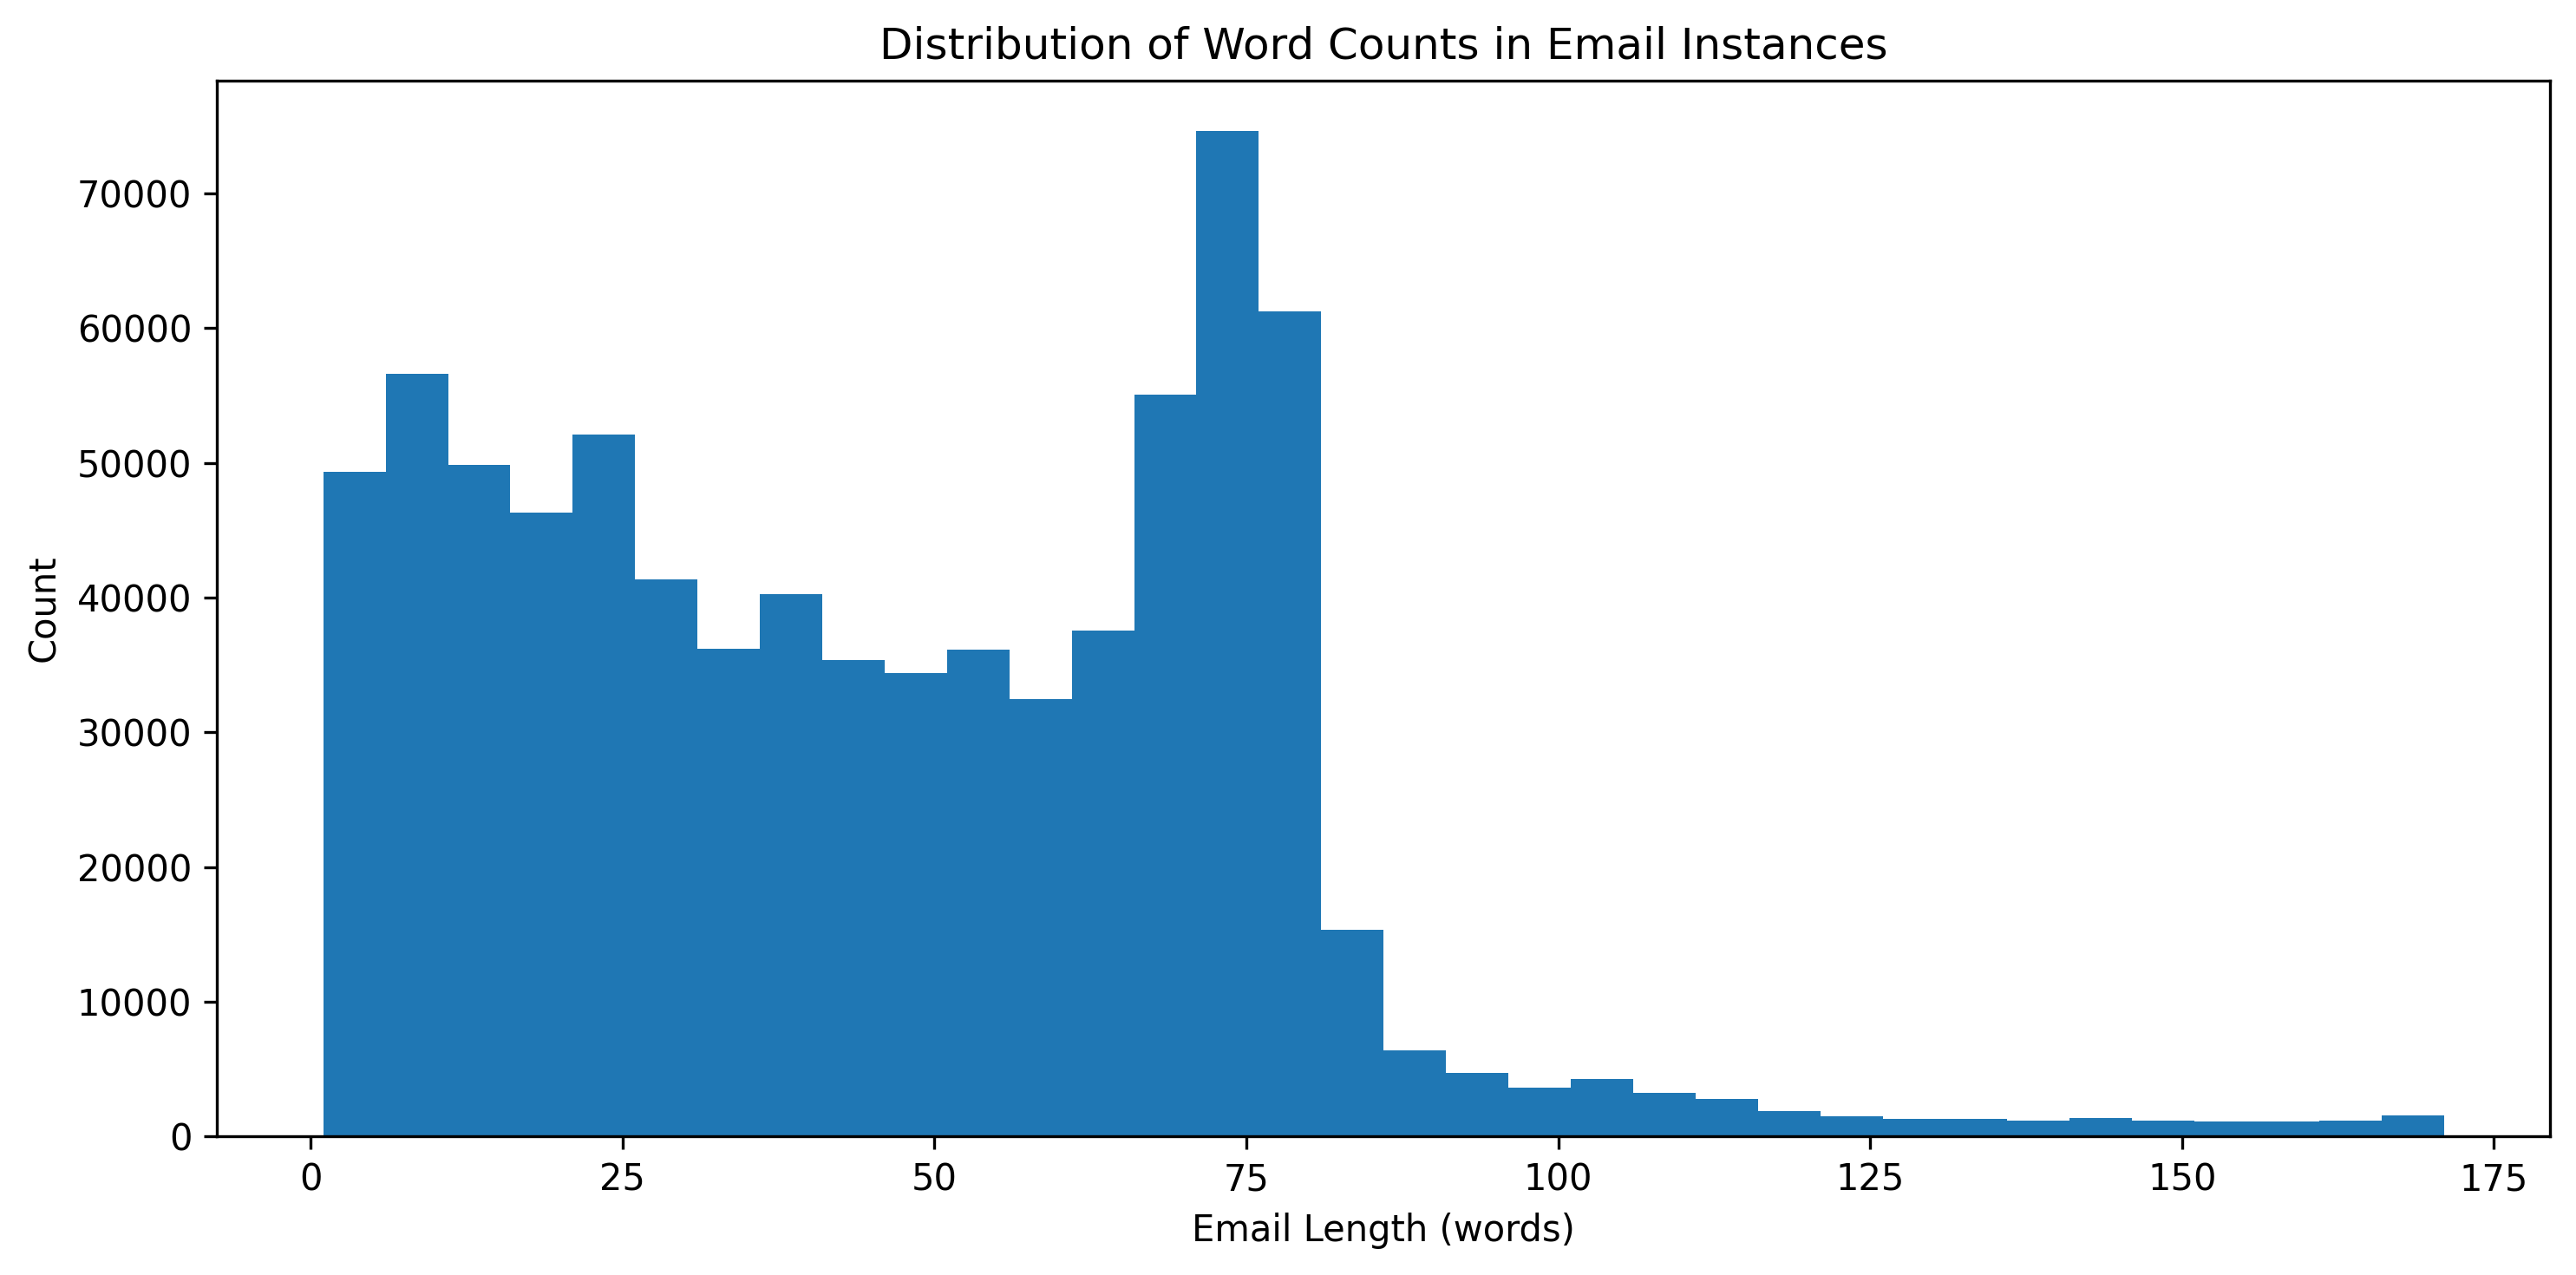

In [45]:
import seaborn as sns
range_min = 1
range_max = 60 + 113

# Plot the average word length in each email instance
#plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(10, 5), dpi=300, tight_layout=True)
plt.hist(email_length_counts, bins=range(range_min, range_max, 5))
plt.xlabel('Email Length (words)')
plt.ylabel('Count')
plt.title('Distribution of Word Counts in Email Instances')
plt.show()


In [46]:
df.shape

(785701, 2)

In [47]:
display(df.head())
display(df.tail())

,X,y
0,aa,0
1,aa,0
2,aa,0
3,aa,0
4,aa,0


,X,y
785696,á þãõ vcd ã óÝøã ô sme ßÞíôÞàµíãìàÞçµ,1
785697,á þãõ vcd êíÞ ã óÝøã ô sme ßÞàÞçµ,1
785698,á þãõ vcd êíÞ ã óÝøã ô smes ßÞíôÞàµíãìàÞ,1
785699,â b åý Ýùø,1
785700,â five million pound cash credited file,1


In [48]:
df['X'] = df['X'].astype(str)
token = [word.lower().split() for word in df['X']]
token_extract = list(itertools.chain(*token))
token_count = collections.Counter(token_extract)

In [49]:
clean_token = pd.DataFrame(token_count.most_common(15), columns=['words', 'count'])

In [50]:
clean_token.to_csv('./results/top_15_most_frequently_used_words.csv', index=False)

In [51]:
display(clean_token)

,words,count
0,com,23968
1,company,22911
2,please,19974
3,would,15394
4,new,15140
5,may,13050
6,information,12985
7,time,12267
8,business,12108
9,said,11866


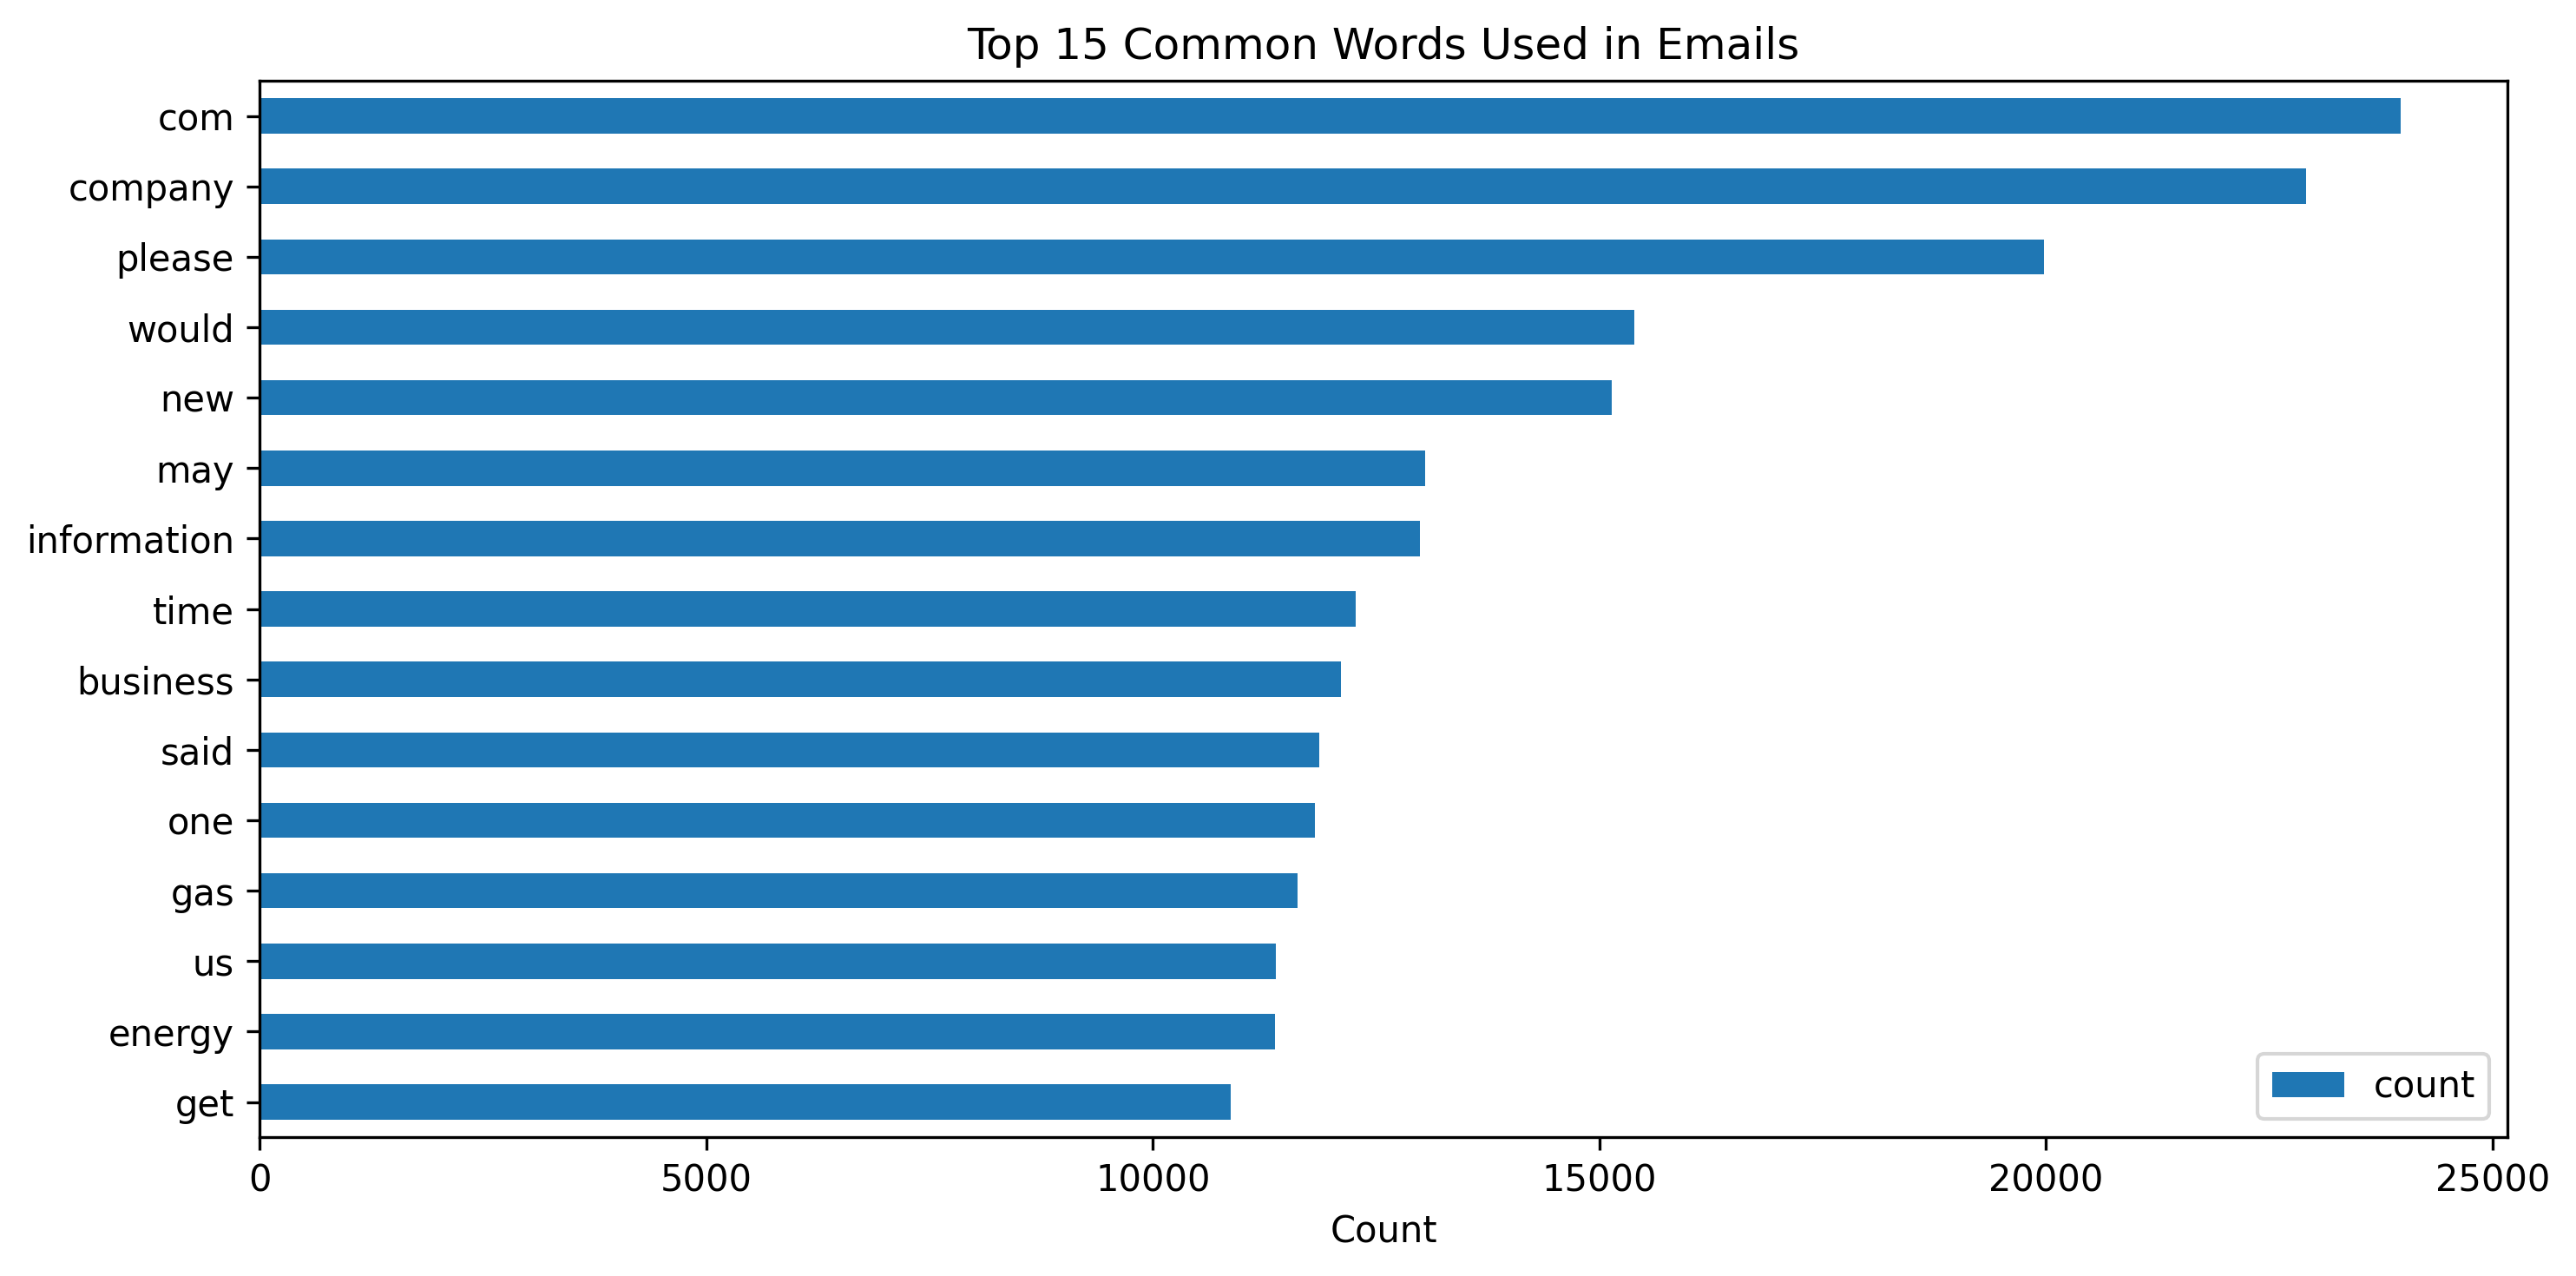

In [52]:
# Visualize top 15 most frequently used words
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_token.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Words Used in Emails")
plt.show()

In [56]:
pos_tags = nltk.pos_tag(token_extract)

adj = []
adv = []
noun = []

for word, pos in pos_tags:
    if (pos in "JJ"):
        adj.append(word)
    if (pos in "WRB"):
        adv.append(word)
    if (pos in "NN"):
        adv.append(word)

adj_count = collections.Counter(adj)
clean_adj = pd.DataFrame(adj_count.most_common(15), columns=['words', 'count'])

adv_count = collections.Counter(adv)
clean_adv = pd.DataFrame(adv_count.most_common(15), columns=['words', 'count'])

noun_count = collections.Counter(noun)
clean_noun = pd.DataFrame(adv_count.most_common(15), columns=['words', 'count'])

In [57]:
display(clean_adj)
display(clean_adv)
display(clean_noun)

,words,count
0,new,15140
1,financial,6116
2,free,6036
3,last,5742
4,next,4942
5,original,4926
6,many,4716
7,available,4329
8,u,4224
9,good,4009


,words,count
0,company,22911
1,com,19327
2,information,12985
3,time,12267
4,business,12108
5,please,11679
6,gas,11623
7,energy,11363
8,price,9413
9,also,9143


,words,count
0,company,22911
1,com,19327
2,information,12985
3,time,12267
4,business,12108
5,please,11679
6,gas,11623
7,energy,11363
8,price,9413
9,also,9143


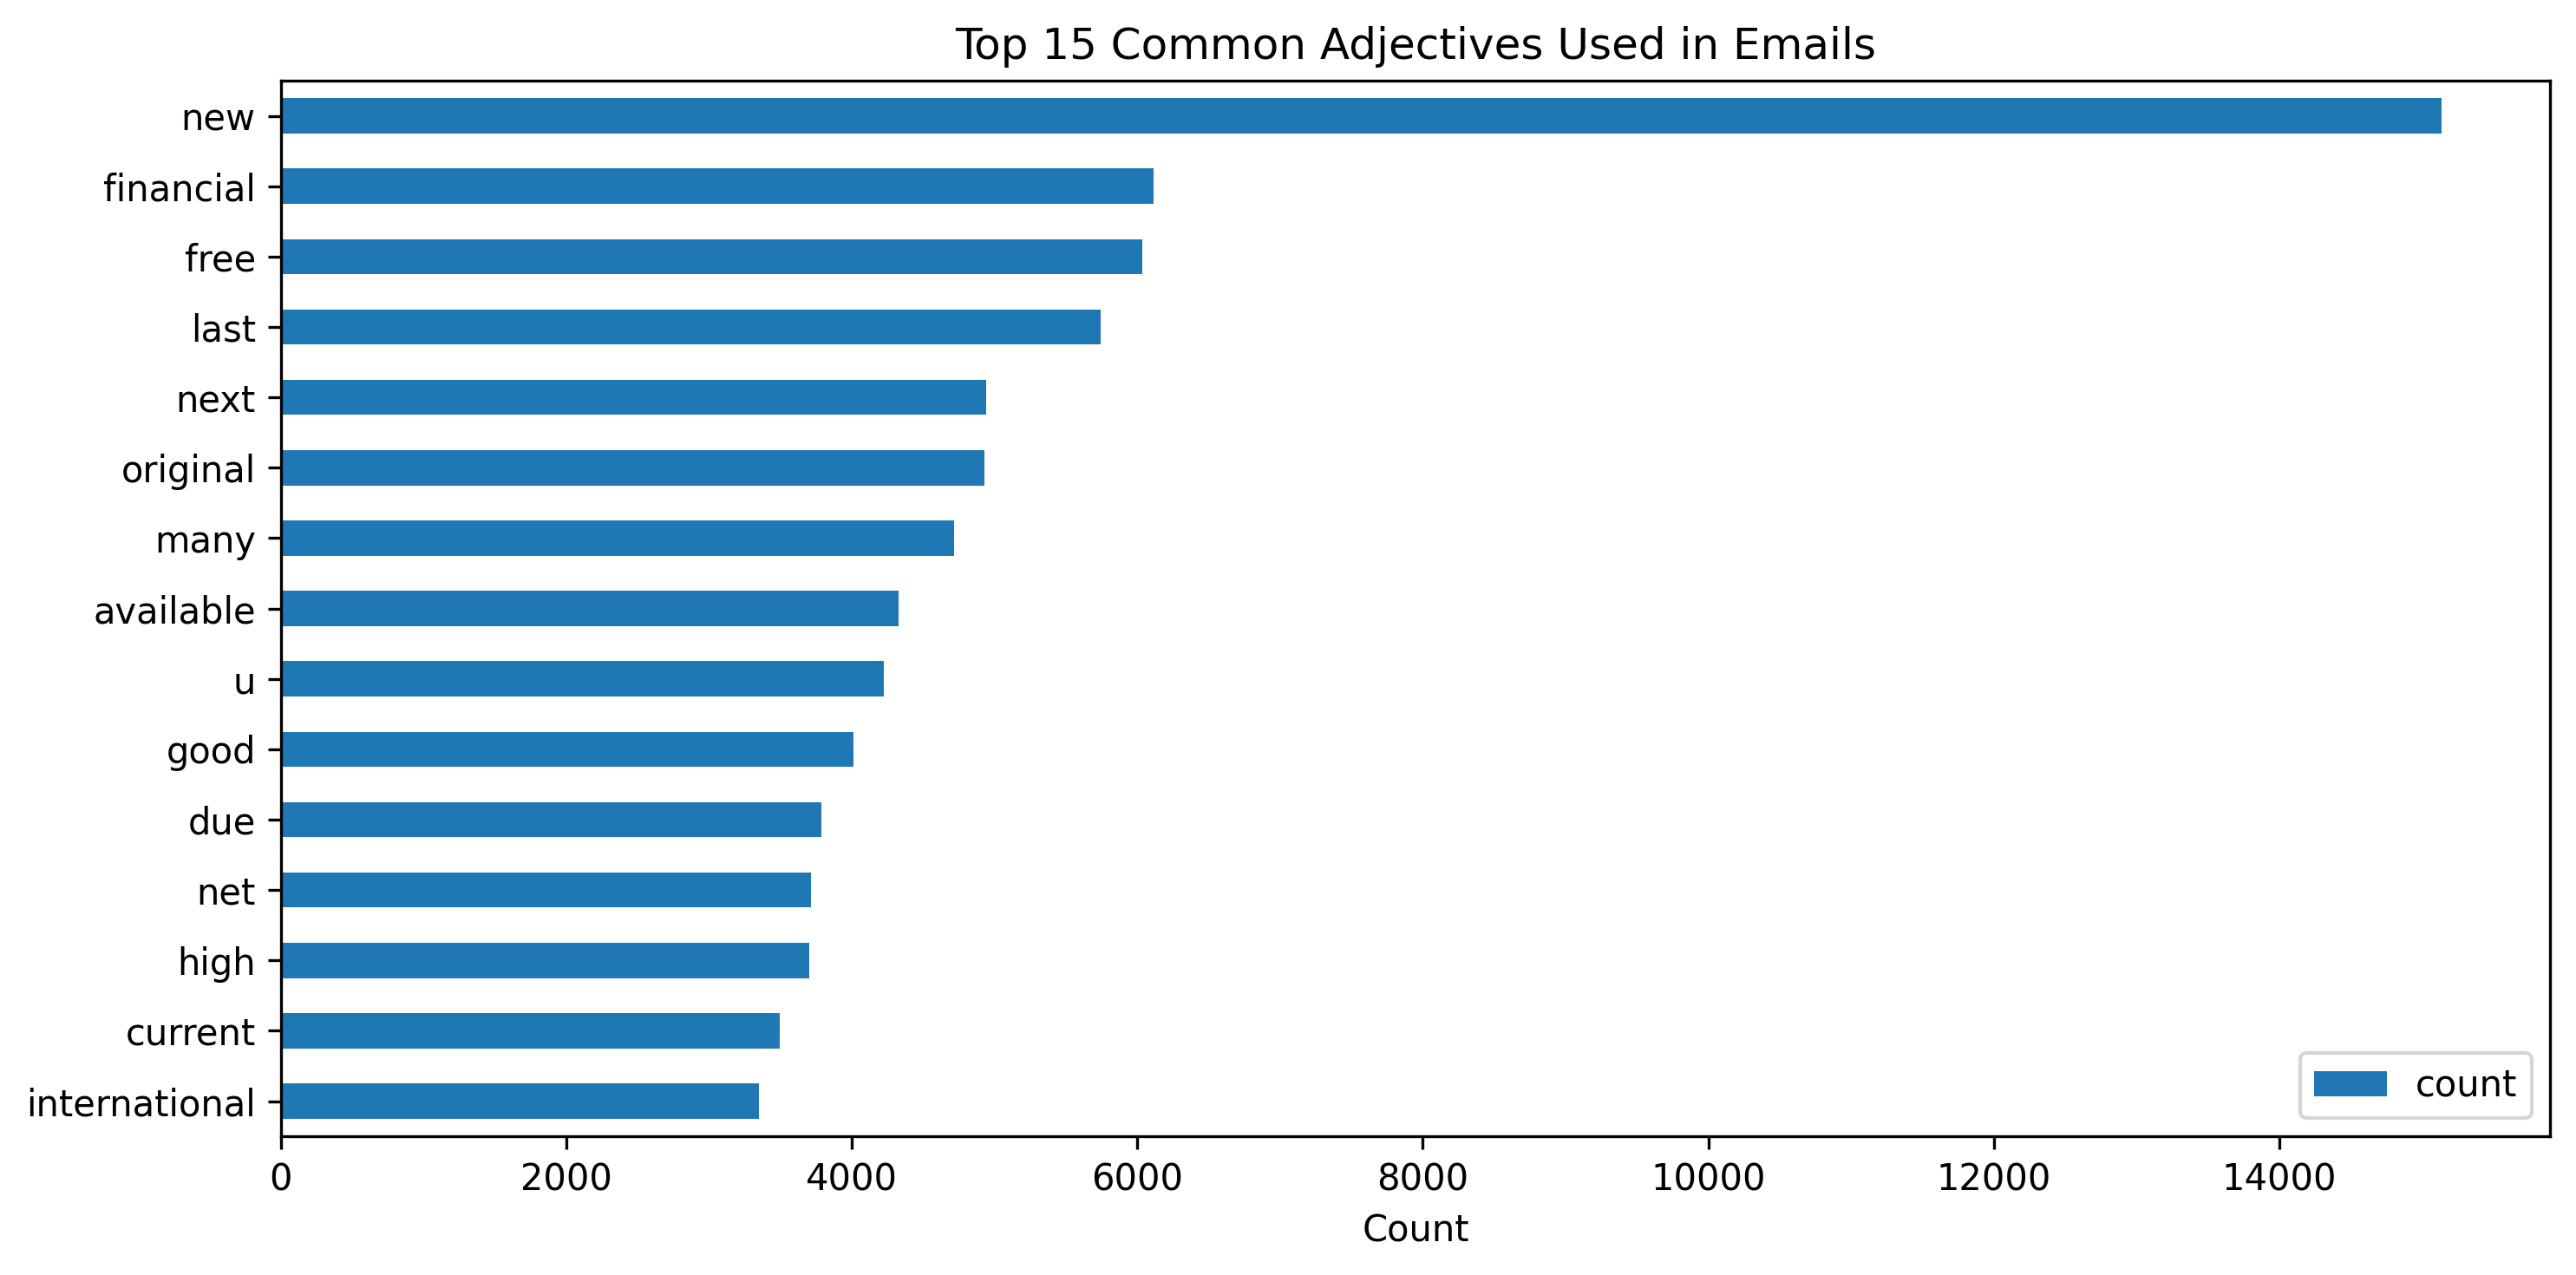

In [58]:
# Visualize top 15 most frequently used adjectives
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_adj.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adjectives Used in Emails")
plt.show()

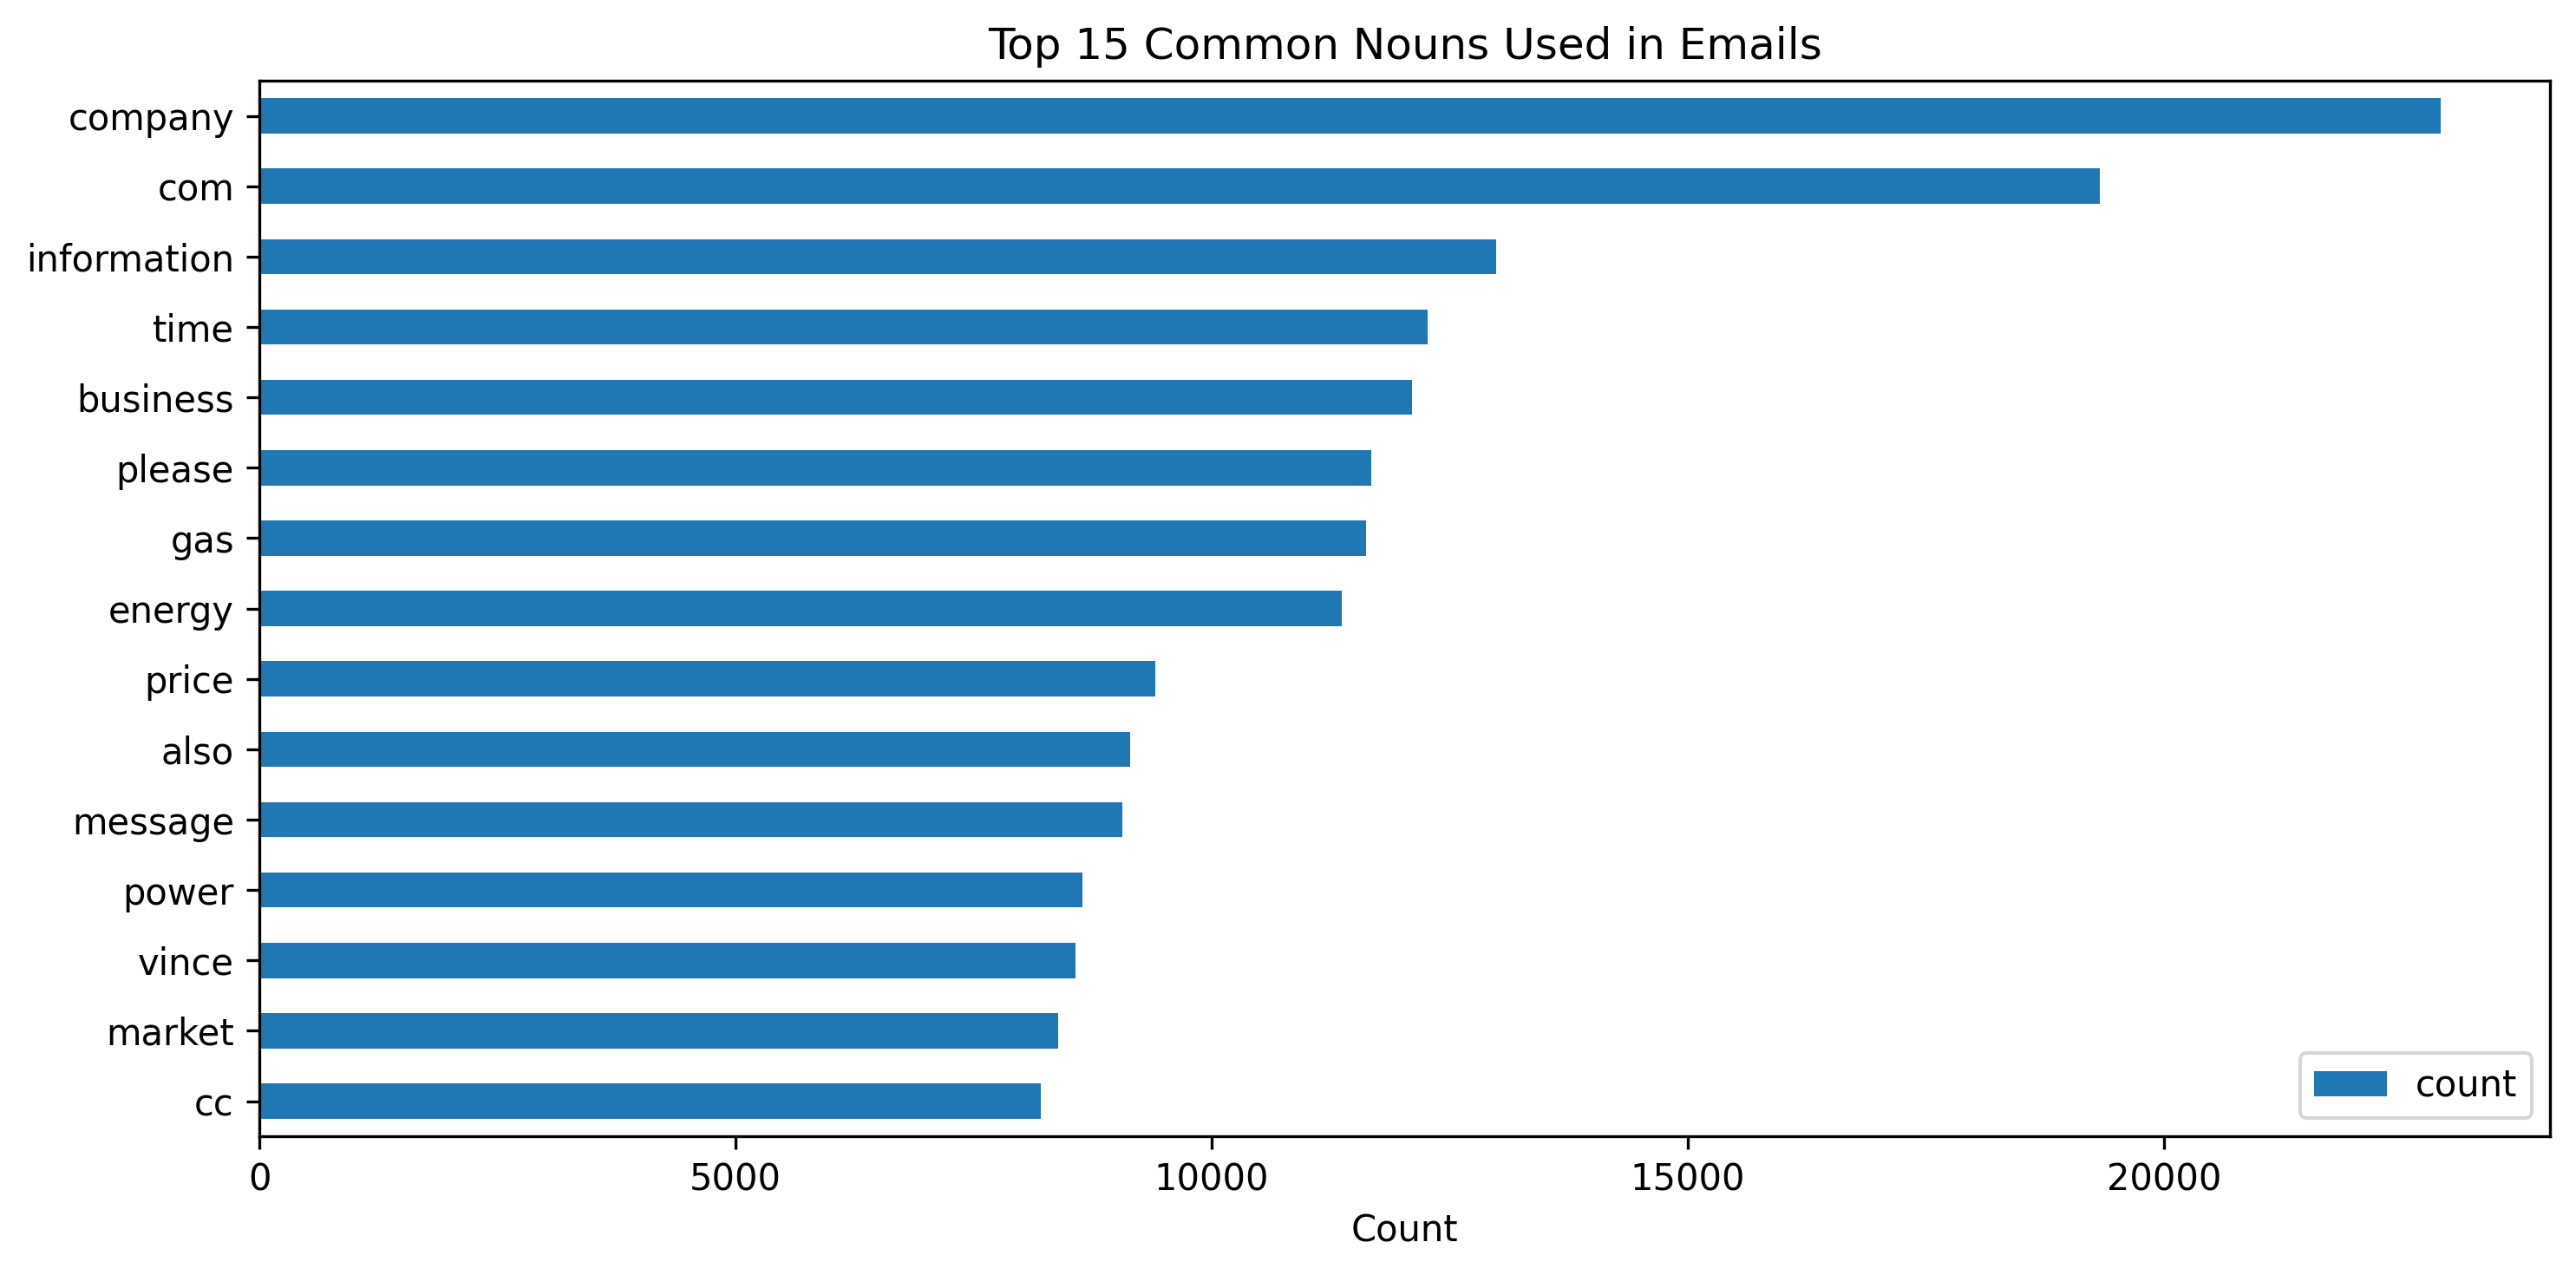

In [59]:
# Visualize top 15 most frequently used nouns
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_noun.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Nouns Used in Emails")
plt.show()

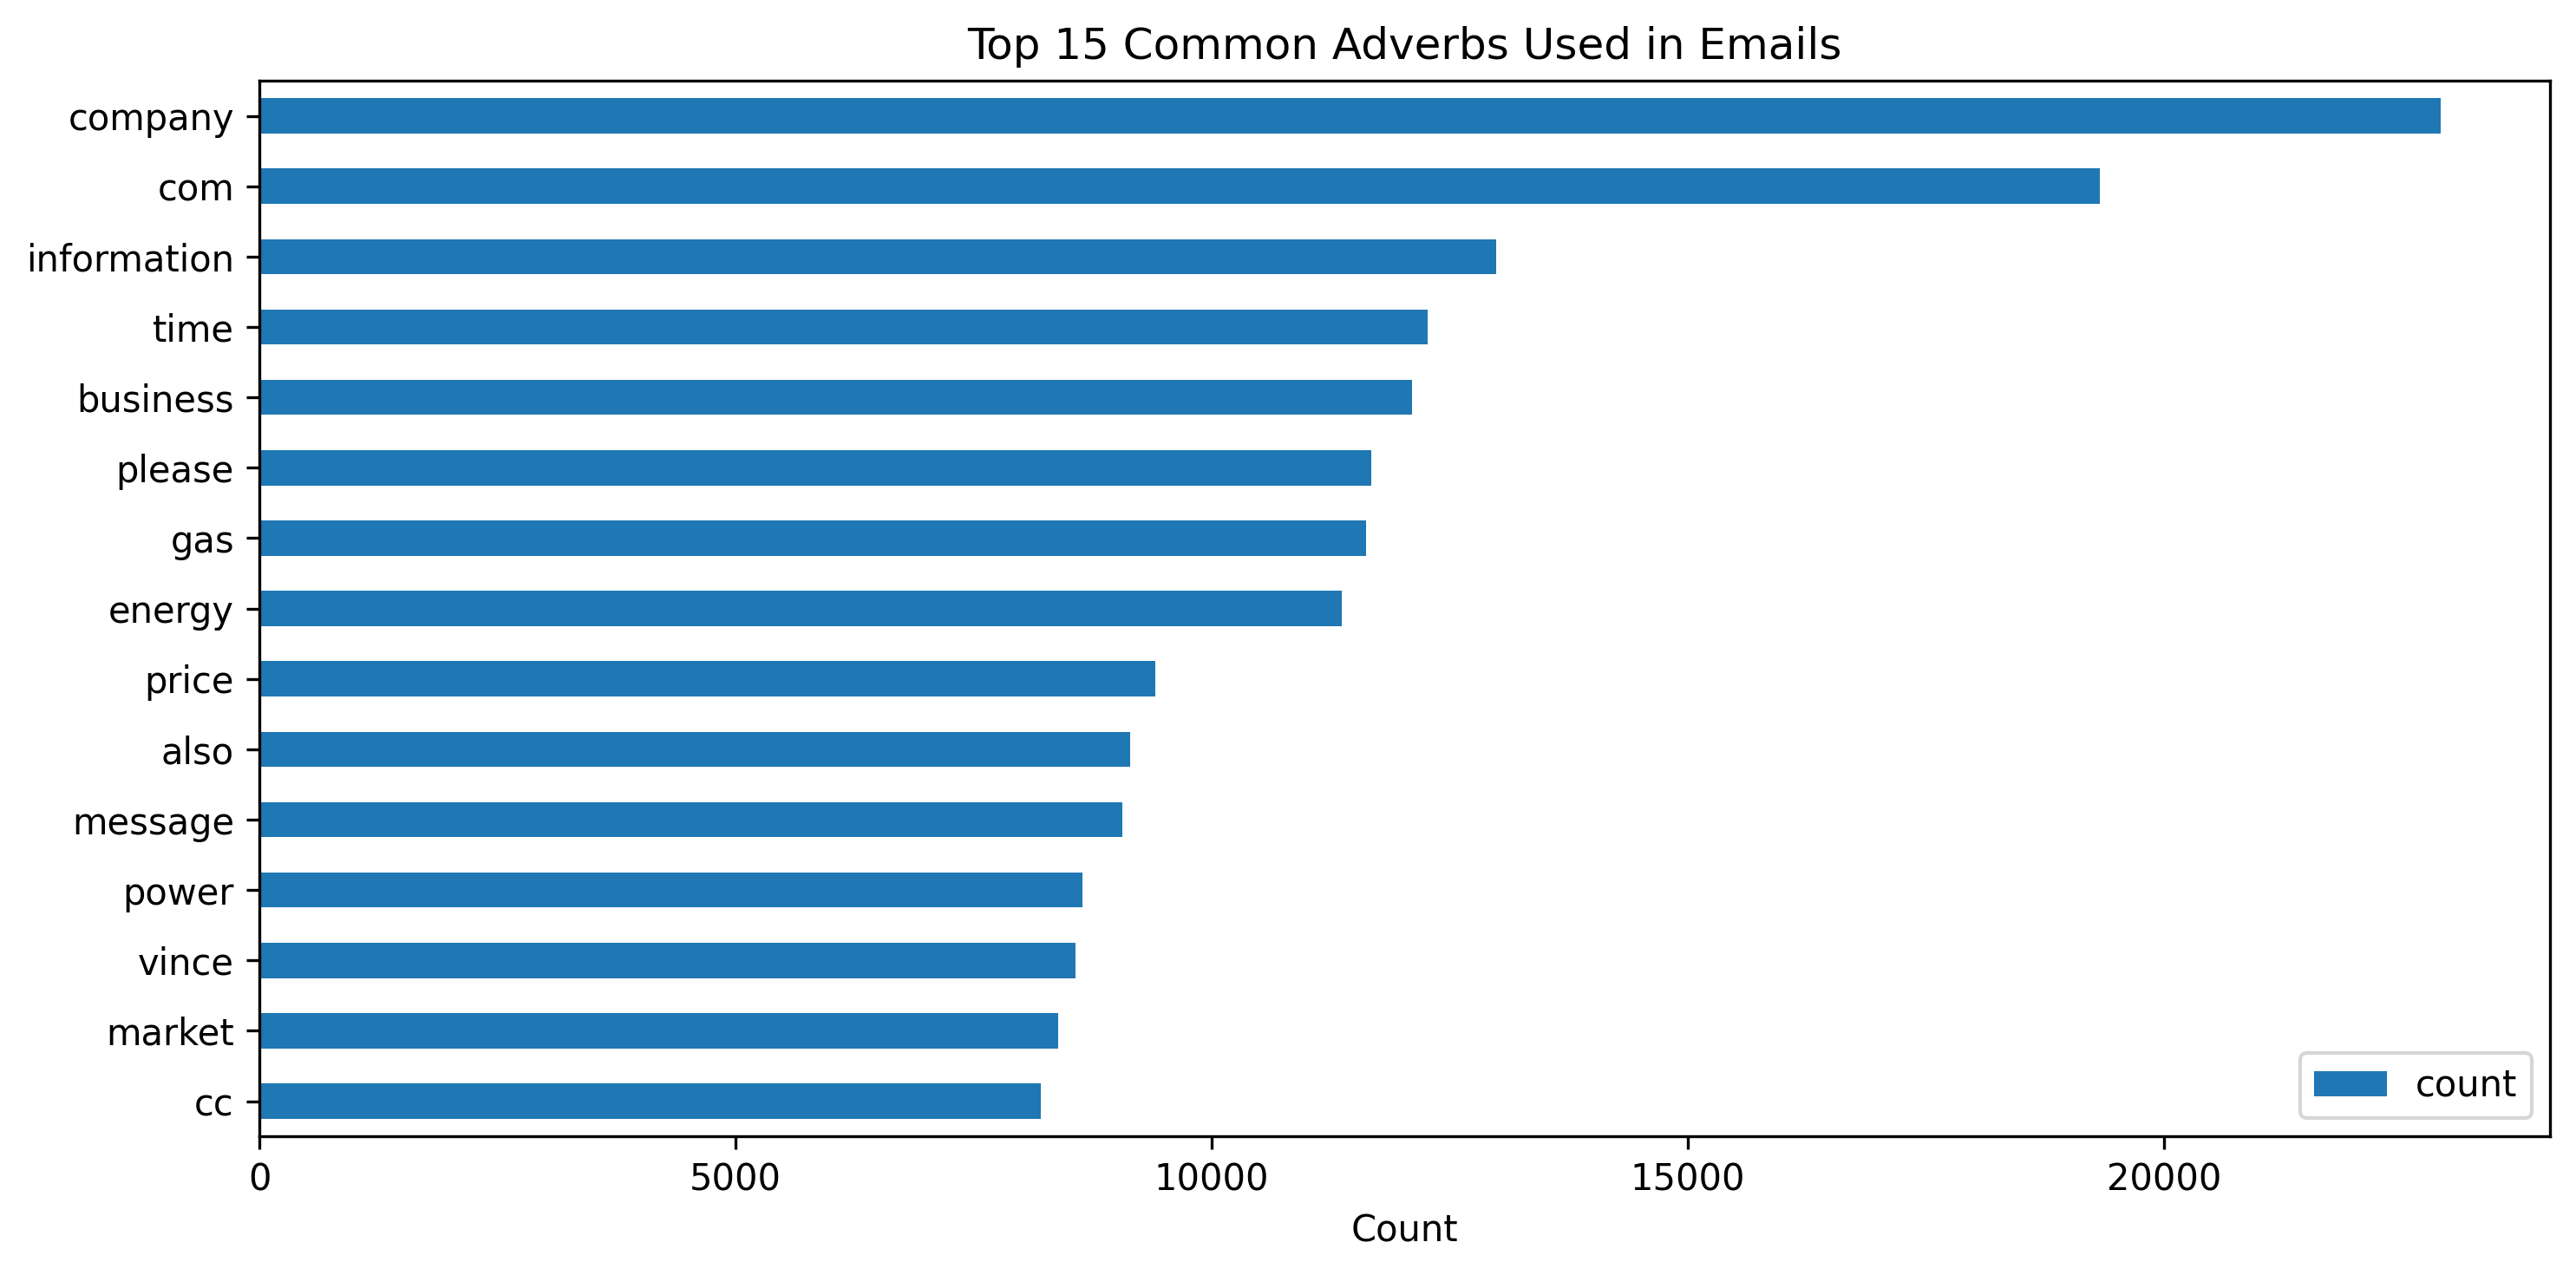

In [60]:
# Visualize top 15 most frequently used adverbs
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_adv.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adverbs Used in Emails")
plt.show()

In [61]:
str_token = ' '.join(map(str, token_extract)) # Convert list token to string
wordcloud_type1 = WordCloud().generate(str_token)

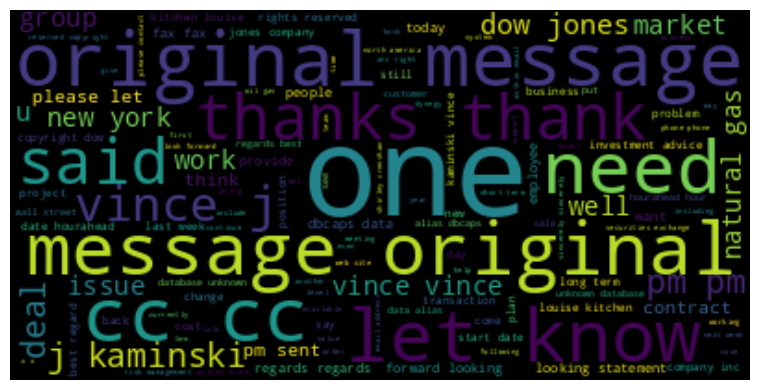

In [62]:
fig = plt.figure(figsize=(8, 4), dpi=100, tight_layout=True)
plt.imshow(wordcloud_type1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
wordcloud_type2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_token)

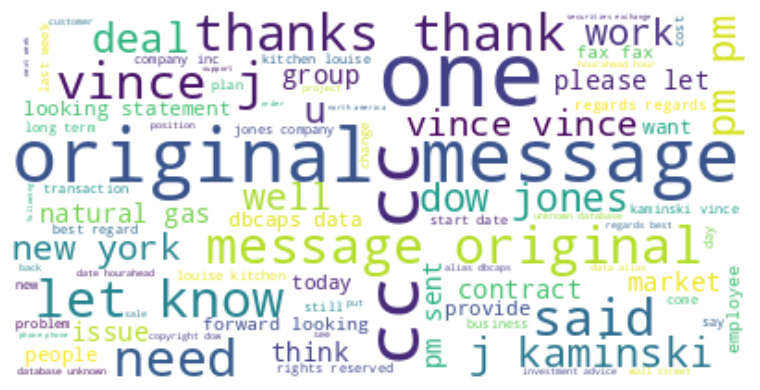

In [64]:
# Change background color and plot a new word cloud graph
fig = plt.figure(figsize=(8, 4), dpi=100, tight_layout=True)
plt.imshow(wordcloud_type2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
display(df['y'].value_counts())
display((df['y'].value_counts() / len(df['y'])) * 100)

,count
y,
0,407140
1,378561


,count
y,
0,51.818694
1,48.181306


In [66]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['X'])

In [67]:
display(X.shape)

(785701, 143367)

In [68]:
# Mapping from feature integer indices to feature name and display the first 15 results.
sample_feature_dict = dict(itertools.islice(vectorizer.vocabulary_.items(), 15))
display(sample_feature_dict)

{'aa': 0,
 'exec': 42310,
 'lead': 71127,
 'congrats': 24921,
 'houston': 57417,
 'office': 88075,
 'interestingly': 62429,
 'enough': 39669,
 'wes': 136144,
 'colwell': 23490,
 'partner': 92279,
 'indicated': 60882,
 'proposal': 99331,
 'regard': 104546,
 'transactions': 126444}

In [69]:
df_sample_features = pd.DataFrame.from_dict(sample_feature_dict, orient='index')

In [70]:
df_sample_features.to_csv('./results/sample_features.csv', index=False)

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [72]:
df_origin = pd.read_csv('./data/emails_cleaned.csv')

In [73]:
# Remove rows containing missing values
df_origin.dropna(subset=['X'], inplace=True)
# Confirm that there is no missing values
df_origin.isnull().sum()

,0
X,0
y,0


In [74]:
df = df_origin.sample(frac=0.05, replace=False, random_state=88)

In [75]:
print('The model-ready dataset contains {} rows.'.format(df.shape[0]))

The model-ready dataset contains 39282 rows.


In [76]:
# Create a vectorization matrix using tf-idf vectorizer
vectorizer = TfidfVectorizer()
vectorized_emails = vectorizer.fit_transform(df.X)
vectorized_emails

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 214025 stored elements and shape (39282, 33114)>

In [77]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(vectorized_emails, df.y, test_size=test_size, random_state=88)

In [78]:
# Setup a hyperparameter grid for random forest
n_estimators = [50, 100, 200, 500]
max_depth = [10, 50, 100, 200]
min_samples_leaf = [10, 20, 50, 100]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth ,'min_samples_leaf': min_samples_leaf}

In [85]:
rf = RandomForestClassifier(criterion='entropy', random_state=88, verbose=0)


In [88]:
rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, n_iter= 10, scoring='roc_auc')

In [89]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=88),
                   param_distributions={'max_depth': [10, 50, 100, 200],
                                        'min_samples_leaf': [10, 20, 50, 100],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='roc_auc')

In [90]:
best_param_rf = rf_cv.best_params_
validation_auc_rf = rf_cv.best_score_

# Predict on the test data
y_pred_prob = rf_cv.predict_proba(X_test)[:, 1]
test_auc_rf = roc_auc_score(y_test, y_pred_prob)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)

In [91]:
rf_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10,
                       n_estimators=200, random_state=88)

In [92]:
print('Tuned Random Forest Parameters: {}'.format(best_param_rf))
print('Tuned Random Forest Validation AUC: {}'.format(validation_auc_rf))
print('Tuned Random Forest Test AUC: {}'.format(test_auc_rf))

Tuned Random Forest Parameters: {'n_estimators': 200, 'min_samples_leaf': 10, 'max_depth': 100}
Tuned Random Forest Validation AUC: 0.8602051525855625
Tuned Random Forest Test AUC: 0.862823415023957


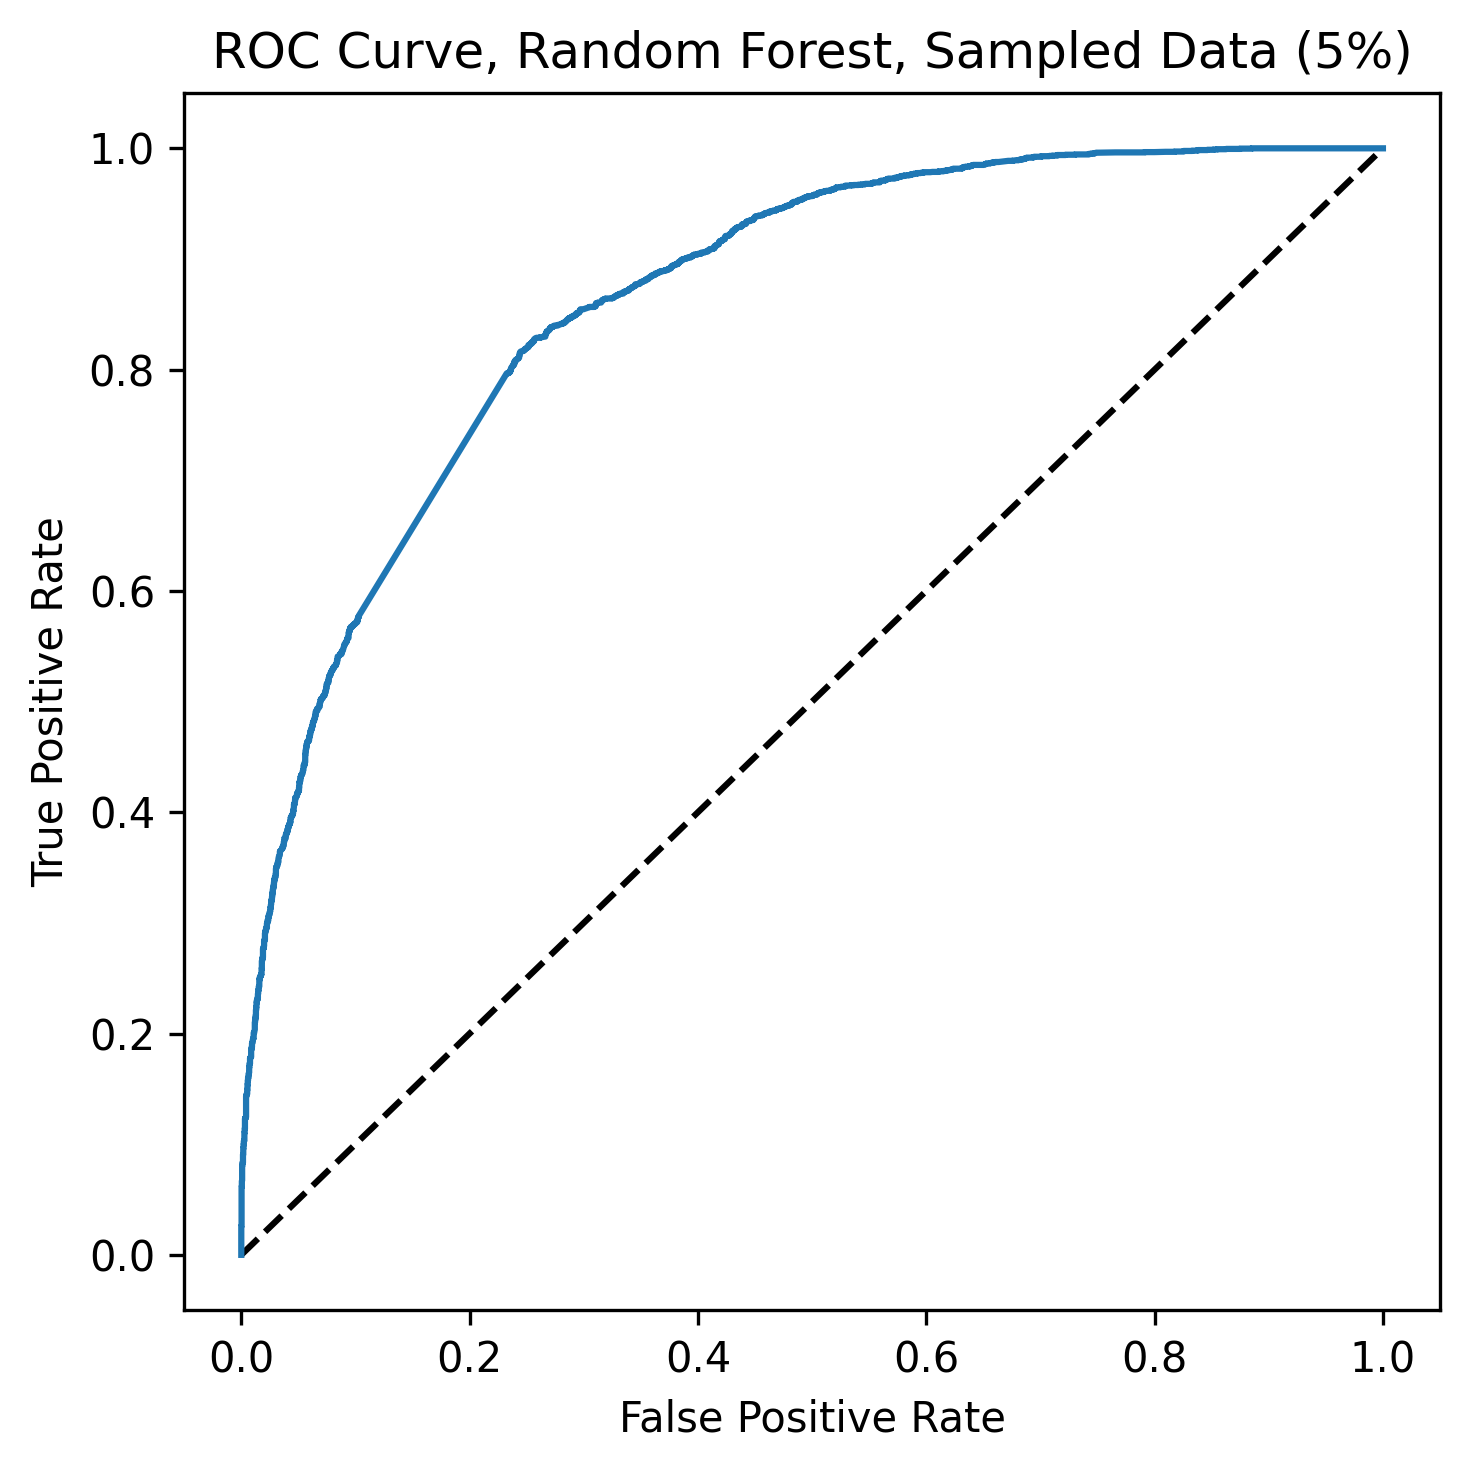

In [94]:
#plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Random Forest, Sampled Data (5%)')
plt.show()

In [95]:
# Create an instance of the SVM classifier
svm = SVC(probability=True)

In [96]:
# Setup a hyperparameter grid for SVM
C = [0.1, 1]
kernel = ['linear']
degree = [2, 3]
gamma = [0.1, 1]
param_grid = {'C': C,'kernel': kernel,}

In [97]:
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1], 'kernel': ['linear']},
             scoring='roc_auc')

In [98]:
best_param_svm = svm_cv.best_params_
validation_auc_svm = svm_cv.best_score_

# Predict on the test data
y_pred_prob = svm_cv.predict_proba(X_test)[:, 1]
test_auc_svm = roc_auc_score(y_test, y_pred_prob)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob)

In [99]:
svm_cv.best_estimator_

SVC(C=1, kernel='linear', probability=True)

In [100]:
print('Tuned SVM Bayes Parameters: {}'.format(best_param_svm))
print('Tuned SVM Validation AUC: {}'.format(validation_auc_svm))
print('Tuned SVM Test AUC: {}'.format(test_auc_svm))

Tuned SVM Bayes Parameters: {'C': 1, 'kernel': 'linear'}
Tuned SVM Validation AUC: 0.917529903665424
Tuned SVM Test AUC: 0.9170056839446563


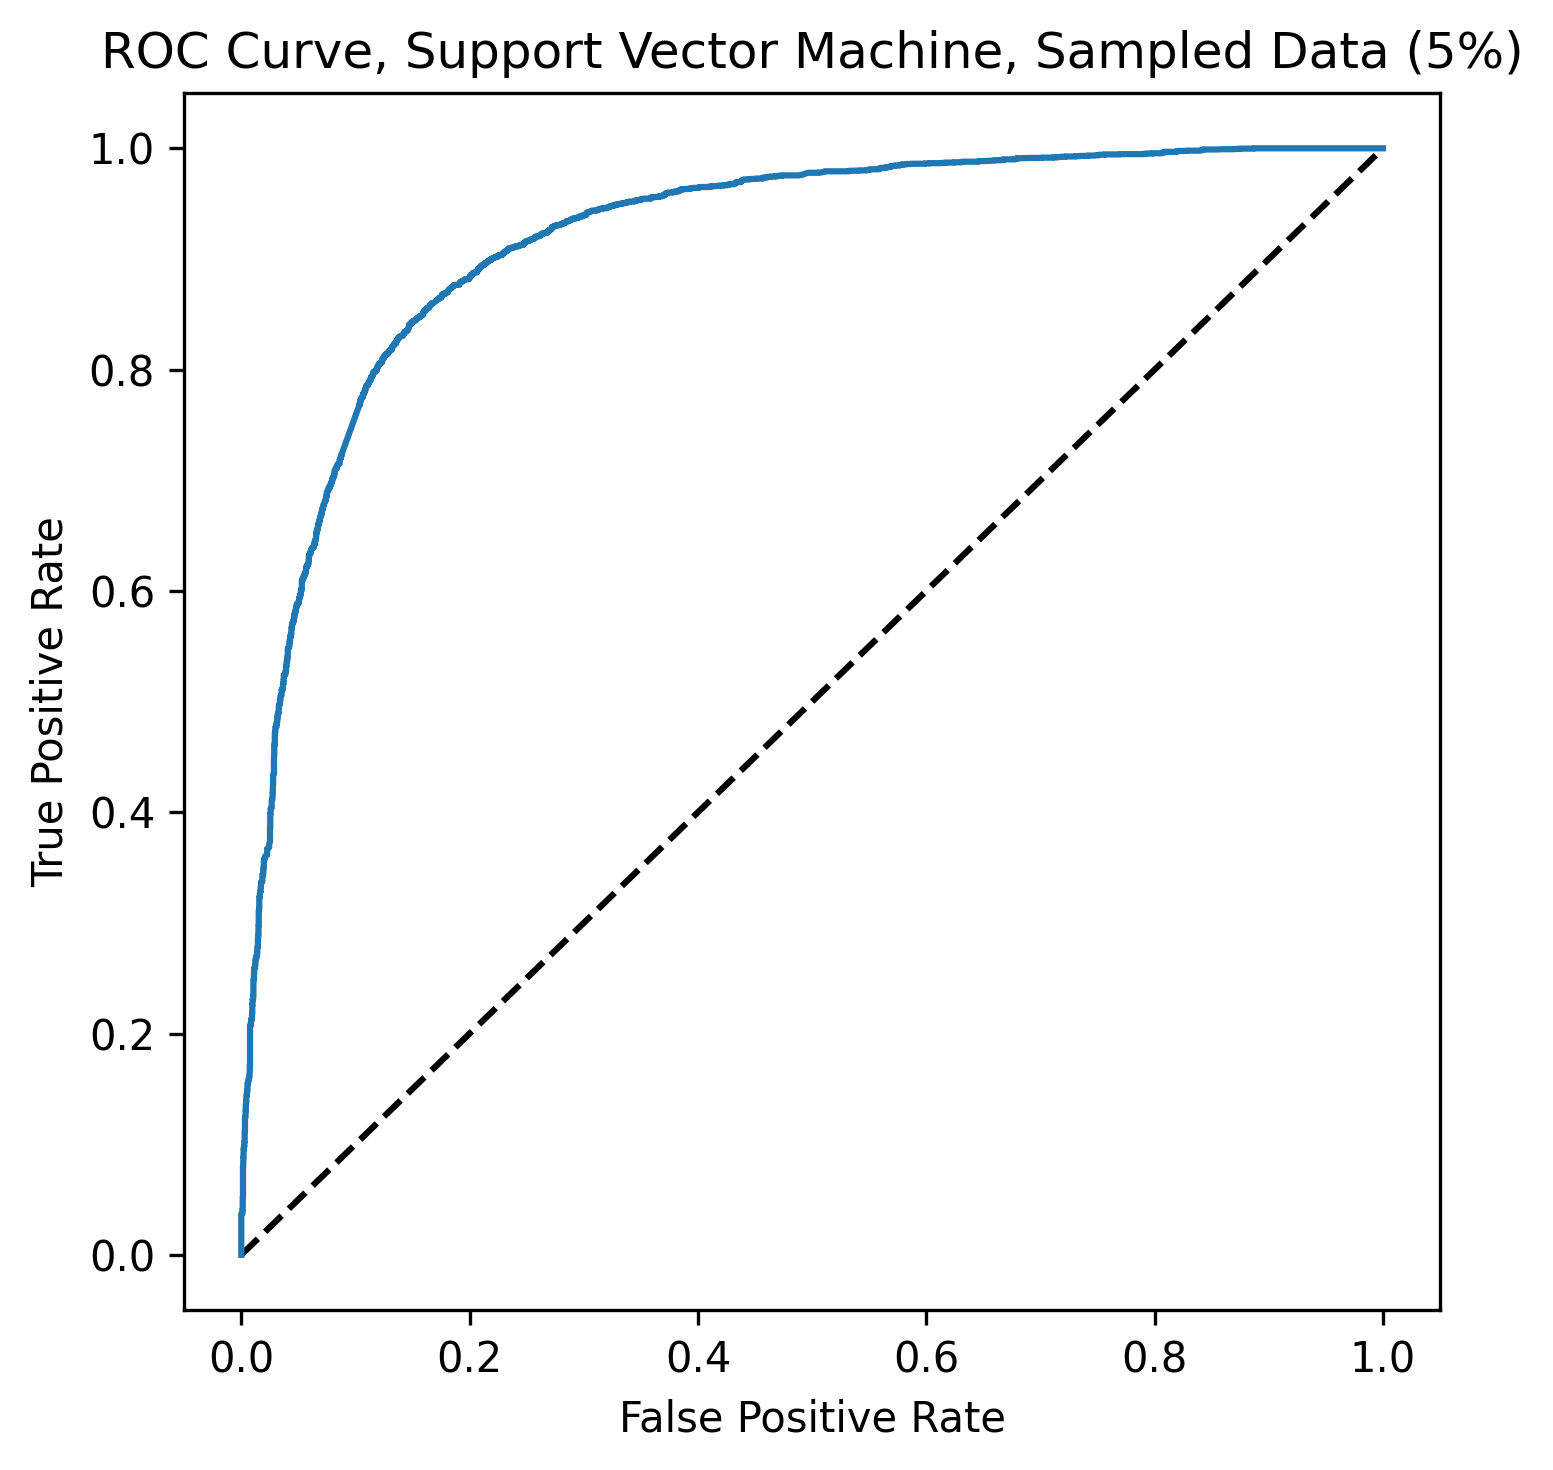

In [102]:
#plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Support Vector Machine, Sampled Data (5%)')
plt.show()

In [103]:
# Setup a hyperparameter grid for gradient boosting machine
n_estimators = [100, 300]
max_depth = [50]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [104]:
gboost = GradientBoostingClassifier(verbose=0.1)

In [105]:
gboost_cv = GridSearchCV(gboost, param_grid, cv=5, scoring='roc_auc')
gboost_cv.fit(X_train, y_train)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'verbose' parameter of GradientBoostingClassifier must be an int in the range [0, inf), an instance of 'bool' or an instance of 'numpy.bool'. Got 0.1 instead.


In [106]:
best_param_gboost = gboost_cv.best_params_
validation_auc_gboost = gboost_cv.best_score_

# Predict on the test data
y_pred_prob = gboost_cv.predict_proba(X_test)[:, 1]
test_auc_gboost = roc_auc_score(y_test, y_pred_prob)
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, y_pred_prob)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [107]:
gboost_cv.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [108]:
print('Tuned Gradient Boosting Parameters: {}'.format(best_param_gboost))
print('Tuned Gradient Boosting Validation AUC: {}'.format(validation_auc_gboost))
print('Tuned Gradient Boosting Test AUC: {}'.format(test_auc_gboost))

NameError: name 'best_param_gboost' is not defined

NameError: name 'fpr_gboost' is not defined

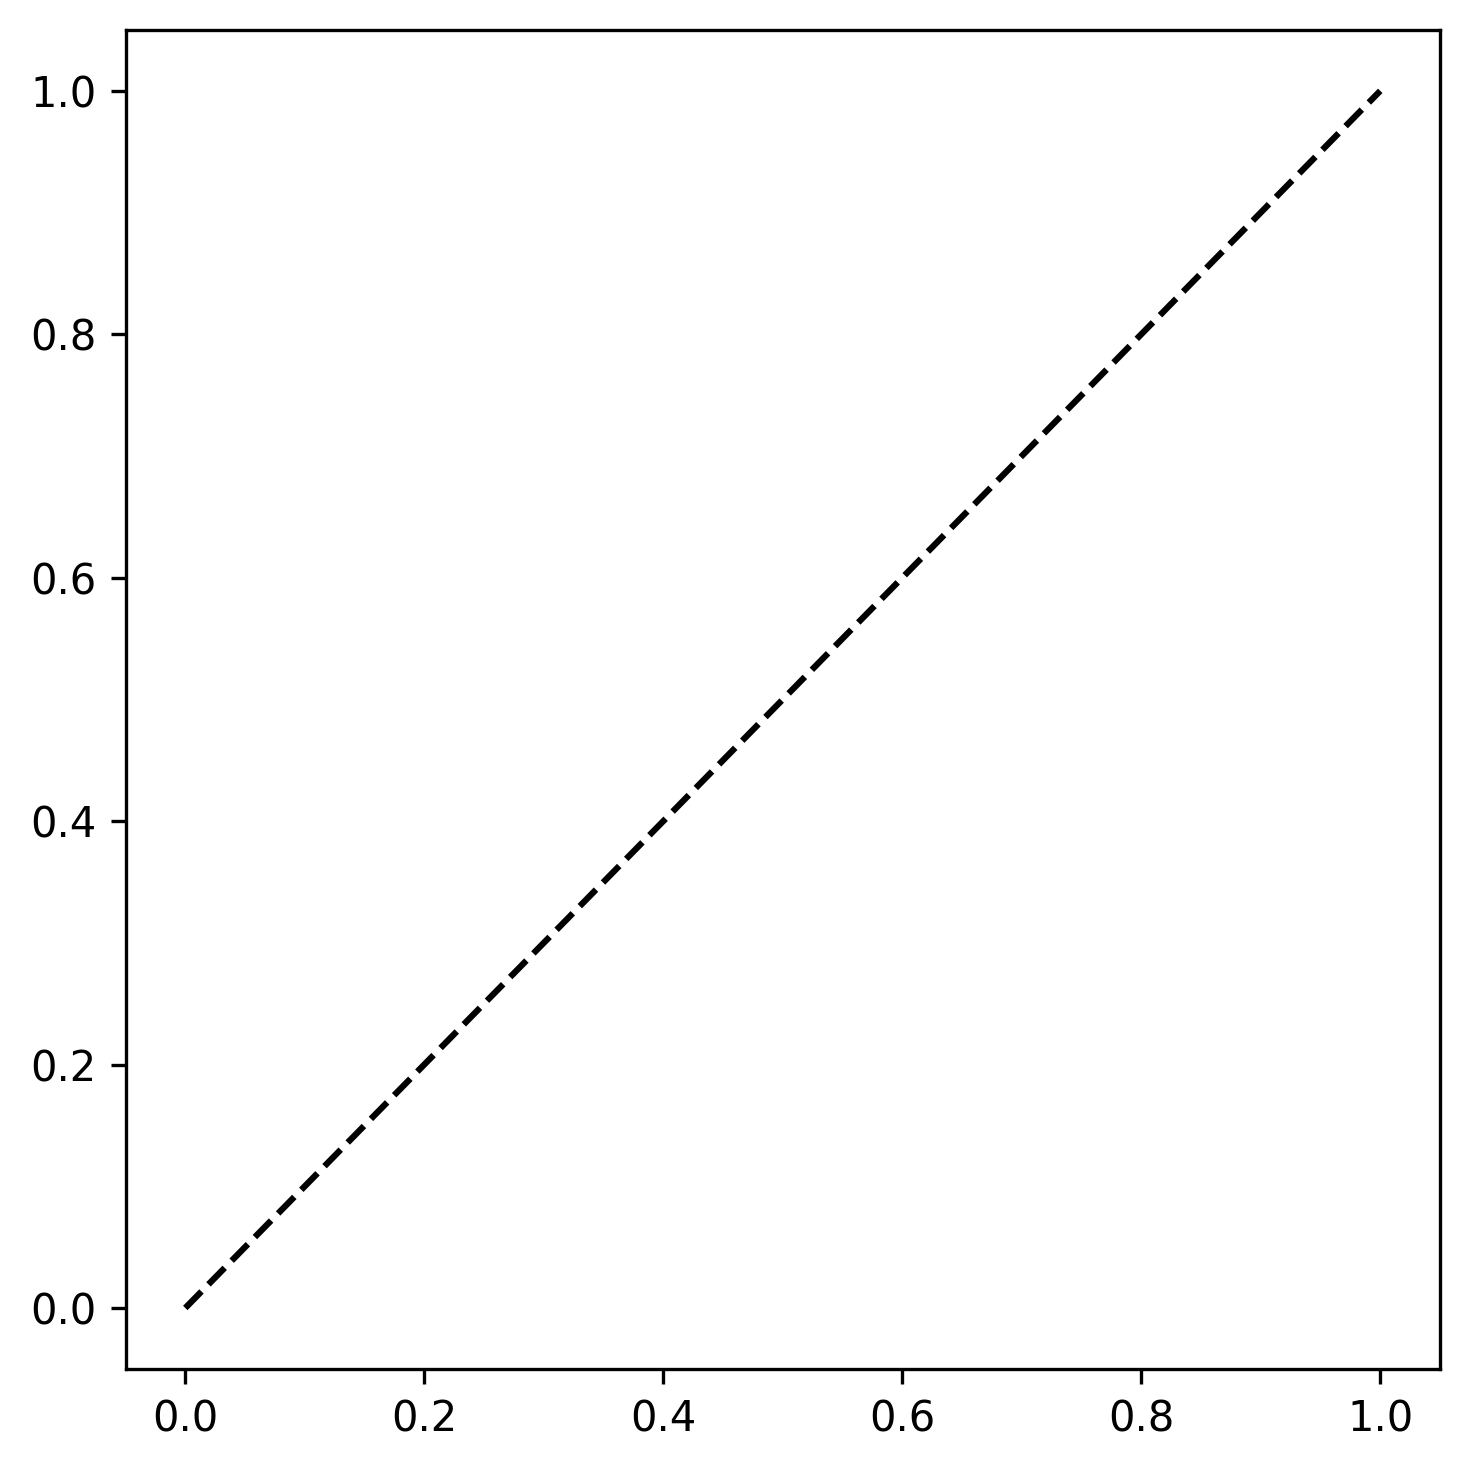

In [109]:
#plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gboost, tpr_gboost)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Gradient Boosting Machine, Sampled Data (5%)')
plt.show()

In [110]:
# Setup a hyperparameter grid for multinomial Naive Bayes
alpha = np.logspace(-2, 1, 4)
param_grid = {'alpha': alpha}

In [111]:
multiNB = MultinomialNB()

In [112]:
multiNB_cv = GridSearchCV(multiNB, param_grid, cv=5, scoring='roc_auc')
multiNB_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='roc_auc')

In [113]:
best_param_multiNB = multiNB_cv.best_params_
validation_auc_multiNB = multiNB_cv.best_score_

# Predict on the test data
y_pred_prob = multiNB_cv.predict_proba(X_test)[:, 1]
test_auc_multiNB = roc_auc_score(y_test, y_pred_prob)
fpr_multiNB, tpr_multiNB, thresholds_multiNB = roc_curve(y_test, y_pred_prob)

In [114]:
multiNB_cv.best_estimator_

MultinomialNB(alpha=np.float64(0.1))

In [115]:
print('Tuned Multinomial Naive Bayes Parameters: {}'.format(best_param_multiNB))
print('Tuned Multinomial Naive Bayes Validation AUC: {}'.format(validation_auc_multiNB))
print('Tuned Multinomial Naive Bayes Test AUC: {}'.format(test_auc_multiNB))

Tuned Multinomial Naive Bayes Parameters: {'alpha': np.float64(0.1)}
Tuned Multinomial Naive Bayes Validation AUC: 0.9310915882953221
Tuned Multinomial Naive Bayes Test AUC: 0.9359299505549354


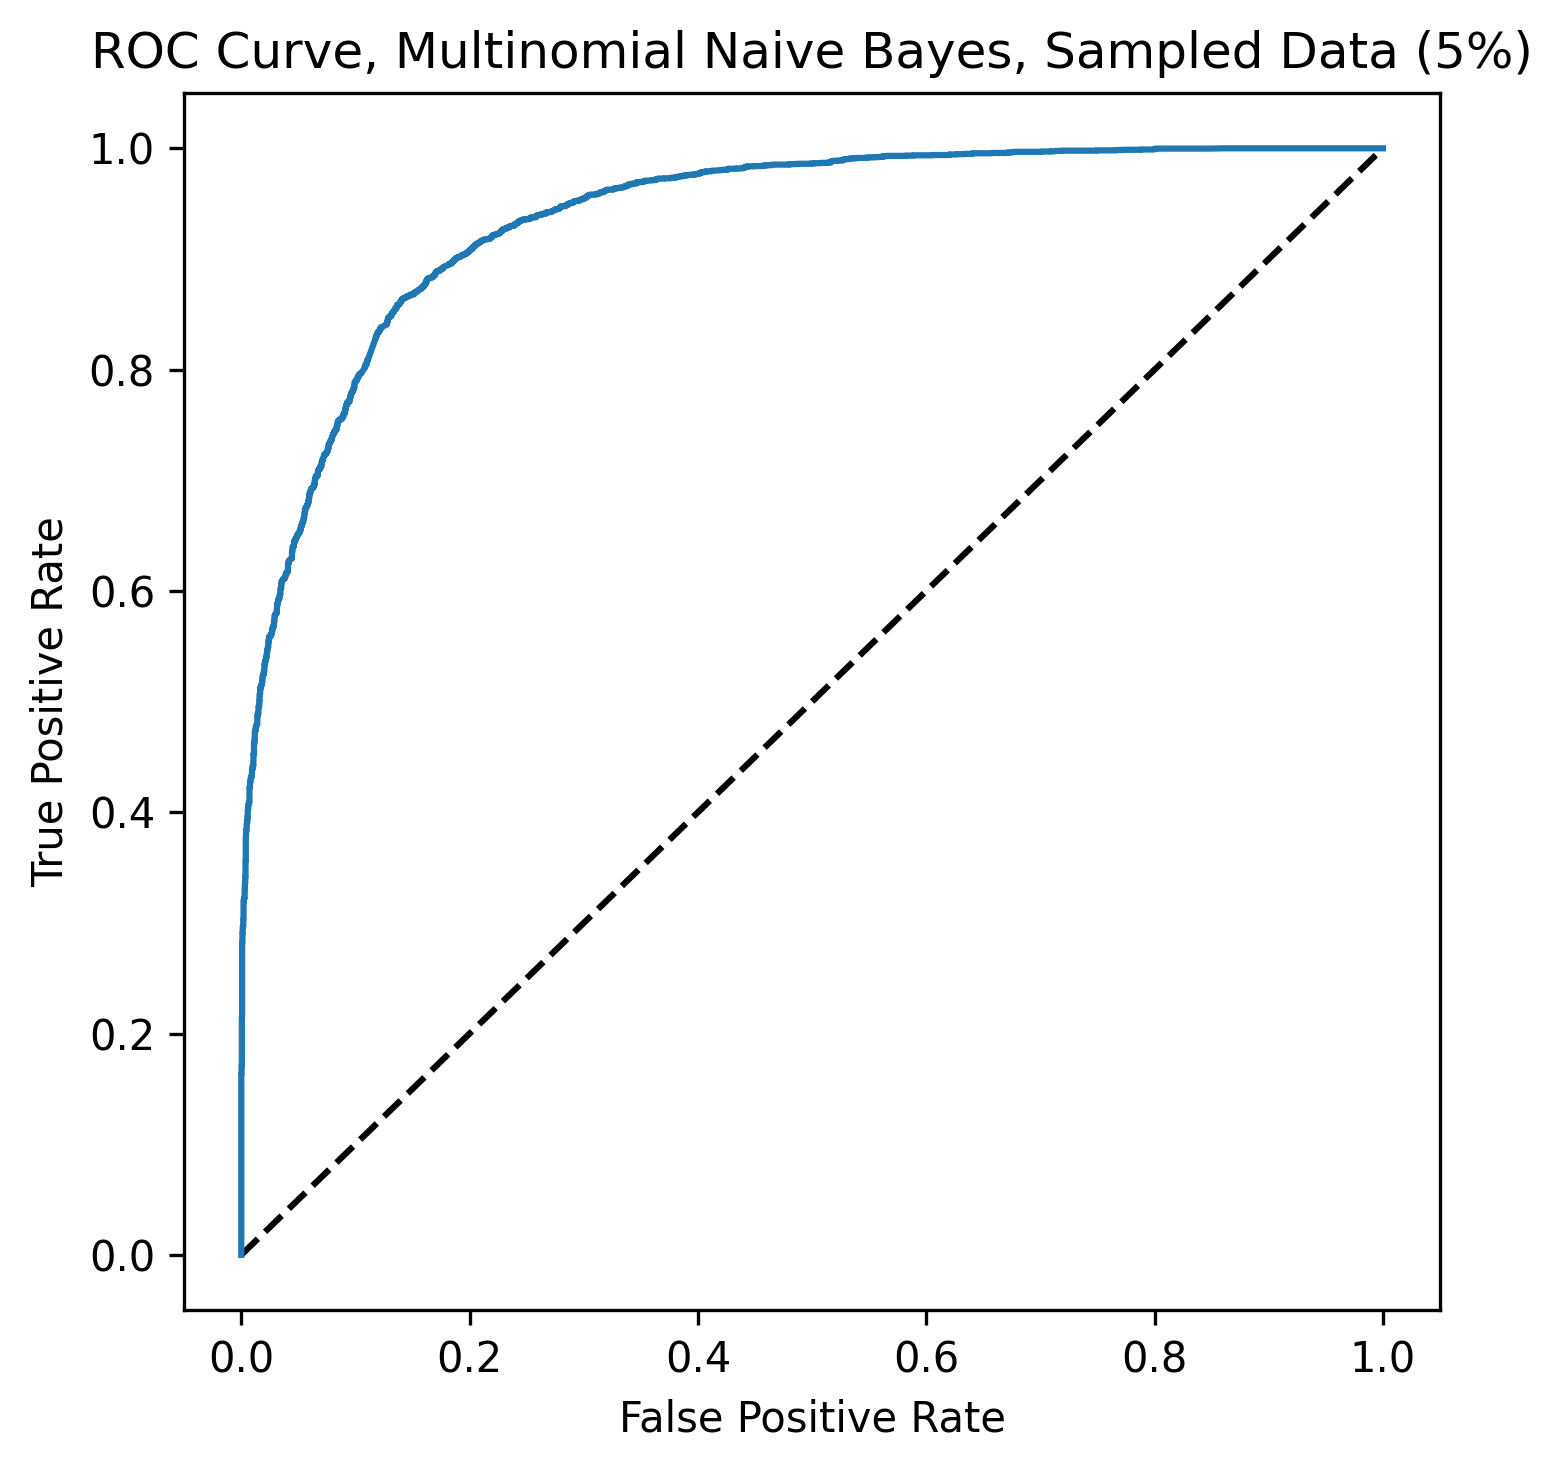

In [116]:
#plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_multiNB, tpr_multiNB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Multinomial Naive Bayes, Sampled Data (5%)')
plt.show()

In [119]:
rf = RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=10,
                            n_estimators=500, random_state=88, verbose=0)

In [120]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [122]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)

In [123]:
print(confusion_matrix(y_test, y_pred))

[[2588 1467]
 [ 395 3407]]


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      4055
           1       0.70      0.90      0.79      3802

    accuracy                           0.76      7857
   macro avg       0.78      0.77      0.76      7857
weighted avg       0.79      0.76      0.76      7857



In [125]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.7311786419435145


In [126]:
print(accuracy_score(y_test, y_pred))

0.7630138729795087


In [127]:
svm = SVC(C=1, kernel='linear', probability=True)

In [128]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [129]:
y_pred_prob = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob)

In [130]:
print(confusion_matrix(y_test, y_pred))

[[3330  725]
 [ 499 3303]]


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4055
           1       0.82      0.87      0.84      3802

    accuracy                           0.84      7857
   macro avg       0.84      0.84      0.84      7857
weighted avg       0.85      0.84      0.84      7857



In [132]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.8293160590539319


In [133]:
print(accuracy_score(y_test, y_pred))

0.8442153493699885


In [121]:
gboost = GradientBoostingClassifier(max_depth=50, n_estimators=300, verbose=0)

In [134]:
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

In [135]:
y_pred_prob = gboost.predict_proba(X_test)[:, 1]
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, y_pred_prob)

In [136]:
print(confusion_matrix(y_test, y_pred))

[[3107  948]
 [ 414 3388]]


In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4055
           1       0.78      0.89      0.83      3802

    accuracy                           0.83      7857
   macro avg       0.83      0.83      0.83      7857
weighted avg       0.83      0.83      0.83      7857



In [138]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.8010971342097797


In [139]:
print(accuracy_score(y_test, y_pred))

0.8266513936617029


In [ ]:
# Get the email as input from the user
email = input("Enter the email: ")

# Prepare the new input data
new_data = [email]

# Convert the new input data into a sparse matrix of word counts
new_data = vectorizer.transform(new_data)

# Use the trained classifier to predict the label for the new input data
predictions = svm.predict(new_data)

# Check the prediction and print the result
if predictions[0] == 1:
    print("This email is spam")
else:
    print("This email is not spam")

Enter the email: Congratulations! 🎉  You’ve been selected to receive a **FREE $1000 Amazon Gift Card**!  To claim your reward, click the secure link below and enter your details:  👉 [http://amaz0n-gift-now.win/claim](http://amaz0n-gift-now.win/claim)  Hurry! This offer expires in 24 hours!  Don't miss out on this once-in-a-lifetime opportunity.  Best regards,   Rewards Department   Amazon Promotions Team  


In [ ]:
multiNB = MultinomialNB(alpha=0.1)

In [ ]:
multiNB.fit(X_train, y_train)
y_pred = multiNB.predict(X_test)

In [ ]:
y_pred_prob = multiNB.predict_proba(X_test)[:, 1]
fpr_multiNB, tpr_multiNB, thresholds_multiNB = roc_curve(y_test, y_pred_prob)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
# Get the email as input from the user
email = input("Enter the email: ")

# Prepare the new input data
new_data = [email]

# Convert the new input data into a sparse matrix of word counts
new_data = vectorizer.transform(new_data)

# Use the trained classifier to predict the label for the new input data
predictions = multiNB.predict(new_data)

# Check the prediction and print the result
if predictions[0] == 1:
    print("This email is spam")
else:
    print("This email is not spam")

In [ ]:
#plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, 'g-', label='Random Forest')
plt.plot(fpr_gboost, tpr_gboost, 'b-', label='Gradient Boosting')
plt.plot(fpr_multiNB, tpr_multiNB, 'y-', label='Multinomial NB')
plt.plot(fpr_svm, tpr_svm, 'r-', label='Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC Curves, Sampled Data (5%)')
plt.legend()
plt.show()